In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)


Read csv and import xtrain, ytrain 

In [17]:
train2_csv = pd.read_csv("./train2.csv")
print(train2_csv)

     x          y
0   24  21.549452
1   50  47.464463
2   15  17.218656
3   38  36.586398
4   87  87.288984
5   36  32.463875
6   12  10.780897
7   81  80.763399
8   25  24.612151
9    5   6.963319
10  16  11.237573
11  16  13.532902
12  24  24.603239
13  39  39.400500
14  54  48.437538
15  60  61.699003
16  26  26.928324
17  73  70.405205
18  29  29.340924
19  31  25.308952
20  68  69.029343
21  87  84.994847
22  58  57.043103
23  54  50.592199
24  84  83.027722
25  58  57.057527
26  49  47.958833
27  20  24.342264
28  90  94.684883
29  48  48.039707


In [30]:
X_train = train2_csv["x"].to_numpy().reshape(-1, 1)
print(X_train)

[[24]
 [50]
 [15]
 [38]
 [87]
 [36]
 [12]
 [81]
 [25]
 [ 5]
 [16]
 [16]
 [24]
 [39]
 [54]
 [60]
 [26]
 [73]
 [29]
 [31]
 [68]
 [87]
 [58]
 [54]
 [84]
 [58]
 [49]
 [20]
 [90]
 [48]]


In [31]:
y_train = train2_csv["y"].to_numpy()
print(y_train)

[21.55 47.46 17.22 36.59 87.29 32.46 10.78 80.76 24.61  6.96 11.24 13.53
 24.6  39.4  48.44 61.7  26.93 70.41 29.34 25.31 69.03 84.99 57.04 50.59
 83.03 57.06 47.96 24.34 94.68 48.04]


In [26]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")


Peak to Peak range by column in Raw        X:[85]
Peak to Peak range by column in Normalized X:[3.41]


In [32]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 115, number of weight updates: 3451.0


In [33]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [24.96], b:[44.34]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [34]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[23.06 49.11 14.04 37.09]
Target values 
[21.55 47.46 17.22 36.59]


In [35]:
test_csv = pd.read_csv("./test.csv")
X_test = test_csv["x"].to_numpy().reshape(-1,1)
y_test = test_csv["y"].to_numpy()
print(X_test)

[[ 77]
 [ 21]
 [ 22]
 [ 20]
 [ 36]
 [ 15]
 [ 62]
 [ 95]
 [ 20]
 [  5]
 [  4]
 [ 19]
 [ 96]
 [ 62]
 [ 36]
 [ 15]
 [ 65]
 [ 14]
 [ 87]
 [ 69]
 [ 89]
 [ 51]
 [ 89]
 [ 27]
 [ 97]
 [ 58]
 [ 79]
 [ 21]
 [ 93]
 [ 27]
 [ 99]
 [ 31]
 [ 33]
 [ 80]
 [ 28]
 [ 47]
 [ 53]
 [ 69]
 [ 28]
 [ 33]
 [ 91]
 [ 71]
 [ 50]
 [ 76]
 [  4]
 [ 37]
 [ 70]
 [ 68]
 [ 40]
 [ 35]
 [ 94]
 [ 88]
 [ 52]
 [ 31]
 [ 59]
 [  0]
 [ 39]
 [ 64]
 [ 69]
 [ 57]
 [ 13]
 [ 72]
 [ 76]
 [ 61]
 [ 82]
 [ 18]
 [ 41]
 [ 50]
 [ 55]
 [ 13]
 [ 46]
 [ 13]
 [ 79]
 [ 53]
 [ 15]
 [ 28]
 [ 81]
 [ 69]
 [ 52]
 [ 84]
 [ 68]
 [ 27]
 [ 56]
 [ 48]
 [ 40]
 [ 39]
 [ 82]
 [100]
 [ 59]
 [ 43]
 [ 67]
 [ 38]
 [ 63]
 [ 91]
 [ 60]
 [ 14]
 [ 21]
 [ 87]
 [ 73]
 [ 32]
 [  2]
 [ 82]
 [ 19]
 [ 74]
 [ 42]
 [ 12]
 [  1]
 [ 90]
 [ 89]
 [  0]
 [ 41]
 [ 16]
 [ 94]
 [ 97]
 [ 66]
 [ 24]
 [ 17]
 [ 90]
 [ 13]
 [  0]
 [ 64]
 [ 96]
 [ 98]
 [ 12]
 [ 41]
 [ 47]
 [ 78]
 [ 20]
 [ 89]
 [ 29]
 [ 64]
 [ 75]
 [ 12]
 [ 25]
 [ 28]
 [ 30]
 [ 65]
 [ 59]
 [ 64]
 [ 53]
 [ 71]
 [ 97]
 [ 73]

In [37]:
X_test_norm = scaler.fit_transform(X_test)
print(X_test_norm)


[[ 0.92]
 [-1.05]
 [-1.02]
 [-1.09]
 [-0.52]
 [-1.26]
 [ 0.39]
 [ 1.55]
 [-1.09]
 [-1.61]
 [-1.65]
 [-1.12]
 [ 1.58]
 [ 0.39]
 [-0.52]
 [-1.26]
 [ 0.49]
 [-1.3 ]
 [ 1.27]
 [ 0.63]
 [ 1.34]
 [ 0.  ]
 [ 1.34]
 [-0.84]
 [ 1.62]
 [ 0.25]
 [ 0.99]
 [-1.05]
 [ 1.48]
 [-0.84]
 [ 1.69]
 [-0.7 ]
 [-0.63]
 [ 1.02]
 [-0.81]
 [-0.14]
 [ 0.07]
 [ 0.63]
 [-0.81]
 [-0.63]
 [ 1.41]
 [ 0.71]
 [-0.03]
 [ 0.88]
 [-1.65]
 [-0.49]
 [ 0.67]
 [ 0.6 ]
 [-0.38]
 [-0.56]
 [ 1.51]
 [ 1.3 ]
 [ 0.04]
 [-0.7 ]
 [ 0.28]
 [-1.79]
 [-0.42]
 [ 0.46]
 [ 0.63]
 [ 0.21]
 [-1.33]
 [ 0.74]
 [ 0.88]
 [ 0.35]
 [ 1.09]
 [-1.16]
 [-0.35]
 [-0.03]
 [ 0.14]
 [-1.33]
 [-0.17]
 [-1.33]
 [ 0.99]
 [ 0.07]
 [-1.26]
 [-0.81]
 [ 1.06]
 [ 0.63]
 [ 0.04]
 [ 1.16]
 [ 0.6 ]
 [-0.84]
 [ 0.18]
 [-0.1 ]
 [-0.38]
 [-0.42]
 [ 1.09]
 [ 1.72]
 [ 0.28]
 [-0.28]
 [ 0.56]
 [-0.45]
 [ 0.42]
 [ 1.41]
 [ 0.32]
 [-1.3 ]
 [-1.05]
 [ 1.27]
 [ 0.78]
 [-0.67]
 [-1.72]
 [ 1.09]
 [-1.12]
 [ 0.81]
 [-0.31]
 [-1.37]
 [-1.75]
 [ 1.37]
 [ 1.34]
 [-1.79]
 [-0.35]
 

In [39]:
y_test_pred = sgdr.predict(X_test_norm)
print(y_test_pred)

[67.2  18.07 18.95 17.2  31.23 12.81 54.04 82.99 17.2   4.04  3.16 16.32
 83.87 54.04 31.23 12.81 56.67 11.93 75.97 60.18 77.73 44.39 77.73 23.34
 84.75 50.53 68.95 18.07 81.24 23.34 86.5  26.85 28.6  69.83 24.21 40.88
 46.15 60.18 24.21 28.6  79.48 61.94 43.51 66.32  3.16 32.11 61.06 59.3
 34.74 30.36 82.11 76.85 45.27 26.85 51.41 -0.35 33.86 55.8  60.18 49.66
 11.06 62.81 66.32 53.16 71.59 15.44 35.62 43.51 47.9  11.06 40.01 11.06
 68.95 46.15 12.81 24.21 70.71 60.18 45.27 73.34 59.3  23.34 48.78 41.76
 34.74 33.86 71.59 87.38 51.41 37.37 58.43 32.99 54.92 79.48 52.29 11.93
 18.07 75.97 63.69 27.72  1.41 71.59 16.32 64.57 36.5  10.18  0.53 78.6
 77.73 -0.35 35.62 13.69 82.11 84.75 57.55 20.71 14.56 78.6  11.06 -0.35
 55.8  83.87 85.62 10.18 35.62 40.88 68.08 17.2  77.73 25.09 55.8  65.45
 10.18 21.58 24.21 25.97 56.67 51.41 55.8  46.15 61.94 84.75 63.69  7.55
 10.18 54.92 86.5  52.29 30.36  1.41 52.29 27.72 82.11 73.34 54.92 18.95
 70.71 81.24 28.6   5.79 36.5  40.01 47.02 13.69 42.6

# Plotting

IndexError: index 1 is out of bounds for axis 1 with size 1

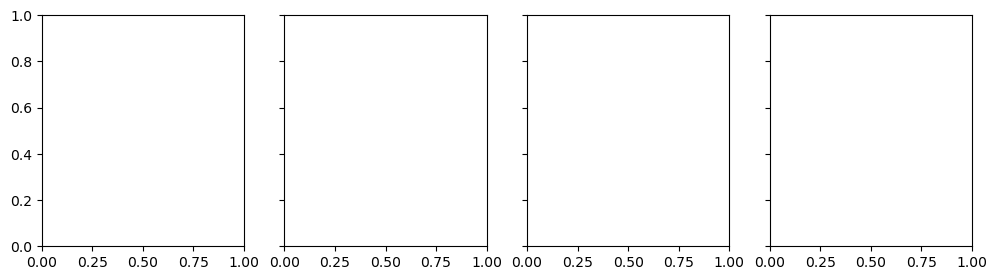

In [42]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
ax[i].scatter(X_test[:],y_test, label = 'target')
ax[i].scatter(X_test[:],y_test_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()